### Random Forest Models

In [48]:
#import basic data cleaning and ML packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV

In [49]:
#load in dataset via basketball reference (all basic and advanced stats, basketball reference link in report)
#data is filtered so it only includes players with 20+ games
dataset = pd.read_csv('update142.csv')

In [50]:
#define Out-of-Sample-R^2, to test each model

def OSR2(model, X_test, y_test, y_train):
    
    y_pred = model.predict(X_test)
    SSE = np.sum((y_test - y_pred)**2)
    SST = np.sum((y_test - np.mean(y_train))**2)
                 
    return (1 - SSE/SST)

## Award 1: MVP

In [89]:
#split train/test by 2017 (7 years train, 4 years test)
train = dataset[dataset['Season'] <= 2017]
test = dataset[dataset['Season'] > 2017]

#split x and y
y_train = train['MVP']
y_test = test['MVP']
x_train = train.iloc[:,6:51]
x_test = test.iloc[:,6:51]

In [90]:
#set grid values for the model
#max_features: cross validate over 46 total stats, analyze via pairs of 2 
#min_samples_leaf: min number of data points per node (ends of each forest branch) 
#n_estimators: number of trees built before calculating average 

grid_values = {'max_features': np.linspace(1,46,23, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

#random forest regressor 
rf2 = RandomForestRegressor() 

#KFold Cross Validation with 5 splits
cv = KFold(n_splits=5,random_state=333,shuffle=True) 

#apply grid values with GridSearchCV(), using r2 as scoring 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.3s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.3s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.1s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.0s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.0s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.9s
[CV] END max_features=3, min_samples_leaf=5, n_

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


GridSearchCV(cv=KFold(n_splits=5, random_state=333, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 46], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='r2', verbose=2)

You can ignore the warning about "FitFailedWarning: Estimator fit failed". It cannot test all 46 with these parameters.

(0.3, 0.8)

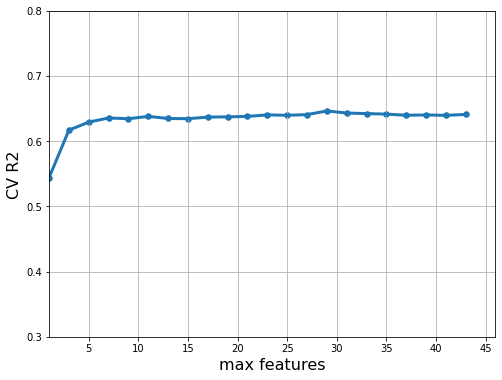

In [91]:
#plot best features vs R^2 scores

max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 46])
plt.ylim([0.3, 0.8])

In [92]:
#print best parameters, best corresponding R^2 value, and most important features

print(rf_cv.best_params_)
print('Cross-validated R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(OSR2(rf_cv, x_test, y_test, y_train), 5))
mvp_rf_imp_features = pd.DataFrame({'Feature' : x_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)
mvp_rf_imp_features = mvp_rf_imp_features.sort_values('Importance score', ascending=False)
mvp_rf_imp_features

{'max_features': 29, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}
Cross-validated R2: 0.64622
OSR2: 0.71304


,Feature,Importance score
44,VORP,38.0
39,WS,24.3
41,OBPM,5.4
37,OWS,4.6
3,FGM,4.5
24,PTS,4.0
43,BPM,2.1
25,PER,2.1
38,DWS,1.7
40,WS48,1.1


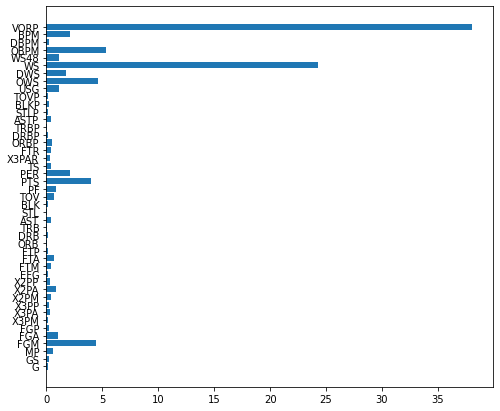

In [93]:
#plot most important features 
plt.figure(figsize=(8,7))
plt.barh(x_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()

#### Analyze MVP Predictions (2010-2017)

In [94]:
#get predictions for each year
mvp_preds = pd.DataFrame(y_train)

#RF Prediction
mvp_preds['preds'] = rf_cv.predict(x_train)
mvp_preds['Player'] = dataset['Player']
mvp_preds['Season'] = dataset['Season']
mvp_preds = mvp_preds.rename(columns = {'MVP': 'actual'})
mvp_preds = mvp_preds.sort_values(by=['preds'], ascending=False)

#change this year value to output table for any year, change the above line to sort by prediction or actual 
mvp_preds[mvp_preds['Season'] == 2017].head()

,actual,preds,Player,Season
3706,0.879,0.689824,Russell Westbrook,2017
1813,0.746,0.613866,James Harden,2017
2381,0.495,0.383697,Kawhi Leonard,2017
2713,0.330,0.340439,LeBron James,2017
1495,0.007,0.158928,Giannis Antetokounmpo,2017


#### Analyze MVP Predictions (2018-2021)

In [95]:
mvp_preds_test = pd.DataFrame(y_test)
mvp_preds_test['preds'] = rf_cv.predict(x_test)
mvp_preds_test['Player'] = dataset['Player']
mvp_preds_test['Season'] = dataset['Season']
mvp_preds_test = mvp_preds_test.rename(columns = {'MVP': 'actual'})
mvp_preds_test = mvp_preds_test.sort_values(by=['preds'], ascending=False)
mvp_preds_test[mvp_preds_test['Season'] == 2020].head()

,actual,preds,Player,Season
1816,0.363,0.393649,James Harden,2020
1498,0.952,0.322317,Giannis Antetokounmpo,2020
427,0.000,0.215557,Bradley Beal,2020
830,0.023,0.214655,Damian Lillard,2020
2716,0.746,0.207428,LeBron James,2020


In [96]:
nba2021 = pd.read_csv('nba2021.csv')
mvp_test_2021 = nba2021.iloc[:,6:51]

mvp_preds_2021 = pd.DataFrame(columns = ['preds'])
mvp_preds_2021['preds'] = rf_cv.predict(mvp_test_2021)
mvp_preds_2021['Player'] = nba2021['Player']
mvp_preds_2021['Season'] = nba2021['Season']
mvp_preds_2021 = mvp_preds_2021.sort_values(by=['preds'], ascending=False)
mvp_preds_2021.head()

,preds,Player,Season
259,0.720751,Nikola Jokic,2021
114,0.230947,Stephen Curry,2021
37,0.226604,Bradley Beal,2021
11,0.218198,Giannis Antetokounmpo,2021
128,0.192164,Luka Doncic,2021


#### Calculate MVP Errors per Year

In [97]:
#collect average difference of actual voting shares and predicting voting shares for the top 10 predicted MVPs of each season from 2010-2017
#calculate the total average of the average differences of each season
avgdiff_array = np.array([])
years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
for year in years:
    season_sort = mvp_preds.sort_values(by=['Season'])
    season = season_sort.loc[season_sort['Season'] == year]
    mvp = season.loc[season['actual'] > 0.0]
    top10mvp = mvp.sort_values(by=['actual'], ascending = False).head(10)
    top10mvp['Abs Diff'] = abs(top10mvp['actual'] - top10mvp['preds'])
    avgdiff = top10mvp['Abs Diff'].mean()
    avgdiff_array = np.append(avgdiff_array, avgdiff)
avgdiff_mvp_train = np.mean(avgdiff_array)
print('Top 10 MVP Absolute Mean Errors Train:', avgdiff_mvp_train)

avgdiff_array = np.array([])
years = np.array([2018, 2019, 2020])
for year in years:
    season_sort = mvp_preds_test.sort_values(by=['Season'])
    season = season_sort.loc[season_sort['Season'] == year]
    mvp = season.loc[season['actual'] > 0.0]
    top10mvp = mvp.sort_values(by=['actual'], ascending = False).head(10)
    top10mvp['Abs Diff'] = abs(top10mvp['actual'] - top10mvp['preds'])
    avgdiff = top10mvp['Abs Diff'].mean()
    avgdiff_array = np.append(avgdiff_array, avgdiff)
avgdiff_mvp_test = np.mean(avgdiff_array)
print('Top 10 MVP Absolute Mean Errors Test:', avgdiff_mvp_test)

avgdiff_smoy = (avgdiff_mvp_train * 8 + avgdiff_mvp_test * 3) / 11

print('Top 10 MVP Absolute Mean Errors:', avgdiff_smoy)

Top 10 MVP Absolute Mean Errors Train: 0.10179697146502559
Top 10 MVP Absolute Mean Errors Test: 0.11355470606579278
Top 10 MVP Absolute Mean Errors: 0.10500362635614392


Now Repeat for every award! 

## Award 2: 6th Man of the Year

In [80]:
smoy_data = pd.read_csv('smoydata142.csv')

smoy_train = smoy_data[smoy_data['Season'] <= 2017]
smoy_test = smoy_data[smoy_data['Season'] > 2017]

y_train = smoy_train['SMOY']
y_test = smoy_test['SMOY']
x_train = smoy_train.iloc[:,6:51]
x_test = smoy_test.iloc[:,6:51]

In [81]:
grid_values = {'max_features': np.linspace(1,46,23, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf2 = RandomForestRegressor() 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.1s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.5s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.7s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.6s
[CV] END max_features=3, min_samples_leaf=5, n_

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


GridSearchCV(cv=KFold(n_splits=5, random_state=333, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 46], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='r2', verbose=2)

(0.2, 0.4)

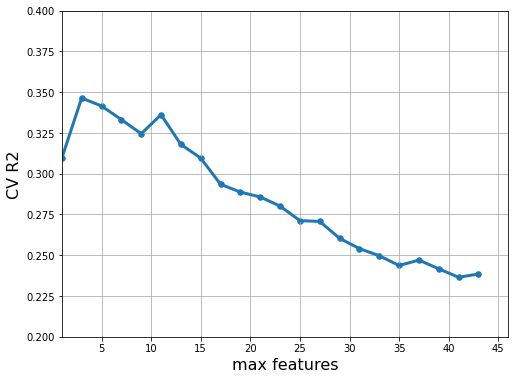

In [82]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 46])
plt.ylim([0.2, 0.4])

In [83]:
print(rf_cv.best_params_)
print('Cross-validated R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(OSR2(rf_cv, x_test, y_test, y_train), 5))
mvp_rf_imp_features = pd.DataFrame({'Feature' : x_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)
mvp_rf_imp_features = mvp_rf_imp_features.sort_values('Importance score', ascending=False)
mvp_rf_imp_features

{'max_features': 3, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}
Cross-validated R2: 0.34644
OSR2: 0.45029


,Feature,Importance score
24,PTS,11.1
2,MP,8.3
4,FGA,7.1
3,FGM,6.3
39,WS,5.2
13,FTM,4.9
7,X3PA,4.6
14,FTA,4.4
37,OWS,3.6
44,VORP,3.2


#### 6MOY Predictions

In [84]:
smoy_preds = pd.DataFrame(y_train)
smoy_preds['preds'] = rf_cv.predict(x_train)
smoy_preds['Player'] = smoy_data['Player']
smoy_preds['Season'] = smoy_data['Season']
smoy_preds = smoy_preds.rename(columns = {'SMOY': 'actual'})
smoy_preds = smoy_preds.sort_values(by=['preds'], ascending=False)
smoy_preds[smoy_preds['Season'] == 2017].head()

,actual,preds,Player,Season
1602,0.140,0.288339,Lou Williams,2017
766,0.716,0.230348,Eric Gordon,2017
103,0.652,0.145372,Andre Iguodala,2017
760,0.028,0.116318,Enes Kanter,2017
2499,0.002,0.076871,Tyler Johnson,2017


In [85]:
smoy_preds_test = pd.DataFrame(y_test)
smoy_preds_test['preds'] = rf_cv.predict(x_test)
smoy_preds_test['Player'] = smoy_data['Player']
smoy_preds_test['Season'] = smoy_data['Season']
smoy_preds_test = smoy_preds_test.rename(columns = {'SMOY': 'actual'})
smoy_preds_test = smoy_preds_test.sort_values(by=['preds'], ascending=False)
smoy_preds_test[smoy_preds_test['Season'] == 2018].head()

,actual,preds,Player,Season
1603,0.980,0.367370,Lou Williams,2018
767,0.487,0.234101,Eric Gordon,2018
2573,0.123,0.214322,Will Barton,2018
1521,0.008,0.169686,Kyle Kuzma,2018
960,0.000,0.119806,Isaiah Thomas,2018


In [86]:
smoy2021 = pd.read_csv('smoy2021.csv')
smoy_test = smoy2021.iloc[:,6:51]

smoy_test_2021 = pd.DataFrame(columns = ['preds'])
smoy_test_2021['preds'] = rf_cv.predict(smoy_test)
smoy_test_2021['Player'] = smoy2021['Player']
smoy_test_2021['Season'] = smoy2021['Season']
smoy_test_2021['G'] = smoy2021['G']


smoy_test_2021 = smoy_test_2021.sort_values(by=['preds'], ascending=False)
smoy_test_2021 = smoy_test_2021[smoy_test_2021['G'] > 30]
smoy_test_2021.head()

,preds,Player,Season,G
54,0.172090,Jordan Clarkson,2021,65
283,0.140813,Terrence Ross,2021,46
115,0.124332,Tim Hardaway Jr.,2021,67
117,0.117753,Montrezl Harrell,2021,67
139,0.114884,Joe Ingles,2021,64


#### 6th Man of the Year Errors

In [88]:
#collect average difference of actual voting shares and predicting voting shares for the top 10 predicted MVPs of each season from 2010-2017
#calculate the total average of the average differences of each season
avgdiff_array = np.array([])
years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
for year in years:
    season_sort = smoy_preds.sort_values(by=['Season'])
    season = season_sort.loc[season_sort['Season'] == year]
    smoy = season.loc[season['actual'] > 0.0]
    top10smoy = smoy.sort_values(by=['actual'], ascending = False).head(10)
    top10smoy['Abs Diff'] = abs(top10smoy['actual'] - top10smoy['preds'])
    avgdiff = top10smoy['Abs Diff'].mean()
    avgdiff_array = np.append(avgdiff_array, avgdiff)
avgdiff_smoy_train = np.mean(avgdiff_array)
print('Top 10 SMOY Absolute Mean Errors Train:', avgdiff_smoy_train)

avgdiff_array = np.array([])
years = np.array([2018, 2019, 2020])
for year in years:
    season_sort = smoy_preds_test.sort_values(by=['Season'])
    season = season_sort.loc[season_sort['Season'] == year]
    smoy = season.loc[season['actual'] > 0.0]
    top10smoy = smoy.sort_values(by=['actual'], ascending = False).head(10)
    top10smoy['Abs Diff'] = abs(top10smoy['actual'] - top10smoy['preds'])
    avgdiff = top10smoy['Abs Diff'].mean()
    avgdiff_array = np.append(avgdiff_array, avgdiff)
avgdiff_smoy_test = np.mean(avgdiff_array)
print('Top 10 SMOY Absolute Mean Errors Test:', avgdiff_smoy_test)

avgdiff_smoy = (avgdiff_smoy_train * 8 + avgdiff_smoy_test * 3) / 11

print('Top 10 SMOY Absolute Mean Errors:', avgdiff_smoy)

Top 10 SMOY Absolute Mean Errors Train: 0.11624875868726313
Top 10 SMOY Absolute Mean Errors Test: 0.17247671907222242
Top 10 SMOY Absolute Mean Errors: 0.13158365697407023


## Award 3: Most Improved Player

In [74]:
mip_data = pd.read_csv('mip_stats.csv')
mip_data

mip_train = mip_data[mip_data['Season'] <= 2017]
mip_test = mip_data[mip_data['Season'] > 2017]

y_train = mip_train['MIP']
y_test = mip_test['MIP']
x_train = mip_train.iloc[:,2:47]
x_test = mip_test.iloc[:,2:47]

In [75]:
grid_values = {'max_features': np.linspace(1,46,23, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf2 = RandomForestRegressor() 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.2s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.8s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.9s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.8s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.8s
[CV] END max_features=3, min_samples_leaf=5, n_

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s
[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.3s


GridSearchCV(cv=KFold(n_splits=5, random_state=333, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 46], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='r2', verbose=2)

In [ ]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 46])
plt.ylim([0.2, 0.4])

In [ ]:
print(rf_cv.best_params_)
print('Cross-validated R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(OSR2(rf_cv, x_test, y_test, y_train), 5))
mvp_rf_imp_features = pd.DataFrame({'Feature' : x_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)
mvp_rf_imp_features = mvp_rf_imp_features.sort_values('Importance score', ascending=False)
mvp_rf_imp_features

#### MIP Predictions

In [76]:
mip_preds = pd.DataFrame(y_train)
mip_preds['preds'] = rf_cv.predict(x_train)
mip_preds['Player'] = mip_data['Player']
mip_preds['Season'] = mip_data['Season']
mip_preds = mip_preds.rename(columns = {'MIP': 'actual'})
mip_preds = mip_preds.sort_values(by=['preds'], ascending=False)
mip_preds[mip_preds['Season'] == 2017].head()

,actual,preds,Player,Season
1138,0.856,0.158003,Giannis Antetokounmpo,2017.0
2473,0.322,0.111266,Nikola Jokic,2017.0
1408,0.068,0.077036,James Johnson,2017.0
2825,0.226,0.075971,Rudy Gobert,2017.0
2835,0.000,0.051939,Russell Westbrook,2017.0


In [77]:
mip_preds_test = pd.DataFrame(y_test)
mip_preds_test['preds'] = rf_cv.predict(x_test)
mip_preds_test['Player'] = mip_data['Player']
mip_preds_test['Season'] = mip_data['Season']
mip_preds_test = mip_preds_test.rename(columns = {'MIP': 'actual'})
mip_preds_test = mip_preds_test.sort_values(by=['preds'], ascending=False)
mip_preds_test[mip_preds_test['Season'] == 2020].head()

,actual,preds,Player,Season
856,0.100,0.098828,Devonte' Graham,2020.0
2115,0.202,0.078338,Luka Doncic,2020.0
3179,0.020,0.058054,Trae Young,2020.0
259,0.590,0.055263,Bam Adebayo,2020.0
2241,0.000,0.051146,Marquese Chriss,2020.0


In [78]:
mip2021 = pd.read_csv('mip2021_stats.csv')
mip2021_test = mip2021.iloc[:,2:51]

mip_test_2021 = pd.DataFrame(columns = ['preds'])
mip_test_2021['preds'] = rf_cv.predict(mip2021_test)
mip_test_2021['Player'] = mip2021['Player']
mip_test_2021['Season'] = mip2021['Season']

mip_test_2021 = mip_test_2021.sort_values(by=['preds'], ascending=False)
mip_test_2021.head()

,preds,Player,Season
265,0.065383,Nikola Jokic,2021.0
71,0.057295,Darius Bazley,2021.0
169,0.047693,Jerami Grant,2021.0
246,0.047388,Michael Porter Jr.,2021.0
208,0.043356,Kevin Porter Jr.,2021.0


#### MIP Errors

In [79]:
#collect average difference of actual voting shares and predicting voting shares for the top 10 predicted MVPs of each season from 2010-2017
#calculate the total average of the average differences of each season
avgdiff_array = np.array([])
years = np.array([2011, 2012, 2013, 2014, 2015, 2016, 2017])
for year in years:
    season_sort = mip_preds.sort_values(by=['Season'])
    season = season_sort.loc[season_sort['Season'] == year]
    mip = season.loc[season['actual'] > 0.0]
    top10mip = mip.sort_values(by=['actual'], ascending = False).head(10)
    top10mip['Abs Diff'] = abs(top10mip['actual'] - top10mip['preds'])
    avgdiff = top10mip['Abs Diff'].mean()
    avgdiff_array = np.append(avgdiff_array, avgdiff)
avgdiff_mip_train = np.mean(avgdiff_array)
print('Top 10 MIP Absolute Mean Errors Train:', avgdiff_mip_train)

avgdiff_array = np.array([])
years = np.array([2018, 2019, 2020])
for year in years:
    season_sort = mip_preds_test.sort_values(by=['Season'])
    season = season_sort.loc[season_sort['Season'] == year]
    mip = season.loc[season['actual'] > 0.0]
    top10mip = roy.sort_values(by=['actual'], ascending = False).head(10)
    top10mip['Abs Diff'] = abs(top10mip['actual'] - top10mip['preds'])
    avgdiff = top10mip['Abs Diff'].mean()
    avgdiff_array = np.append(avgdiff_array, avgdiff)
avgdiff_mip_test = np.mean(avgdiff_array)
print('Top 10 MIP Absolute Mean Errors Test:', avgdiff_mip_test)

avgdiff_mip = (avgdiff_mip_train * 7 + avgdiff_mip_test * 3) / 11

print('Top 10 MIP Absolute Mean Errors:', avgdiff_mip)

Top 10 MIP Absolute Mean Errors Train: 0.1132789456658081
Top 10 MIP Absolute Mean Errors Test: 0.17247671907222242
Top 10 MIP Absolute Mean Errors: 0.11912570698884763


## Award 4: Rookie of the Year

In [61]:
roy_data = pd.read_csv('roydata142.csv')
roy_data

roy_train = roy_data[roy_data['Season'] <= 2017]
roy_test = roy_data[roy_data['Season'] > 2017]

y_train = roy_train['ROY']
y_test = roy_test['ROY']
x_train = roy_train.iloc[:,6:51]
x_test = roy_test.iloc[:,6:51]

In [62]:
grid_values = {'max_features': np.linspace(1,46,23, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [250],
               'random_state': [88]} 

rf2 = RandomForestRegressor() 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.5s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.4s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.4s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.4s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.4s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.5s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.5s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.5s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.4s
[CV] END max_features=3, min_samples_leaf=5, n_

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.1s
[CV] END max_features=46, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.1s
[CV] END max_features=46, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.1s


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=250, random_state=88; total time=   0.1s


GridSearchCV(cv=KFold(n_splits=5, random_state=333, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 46], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [250],
                         'random_state': [88]},
             scoring='r2', verbose=2)

(0.3, 0.7)

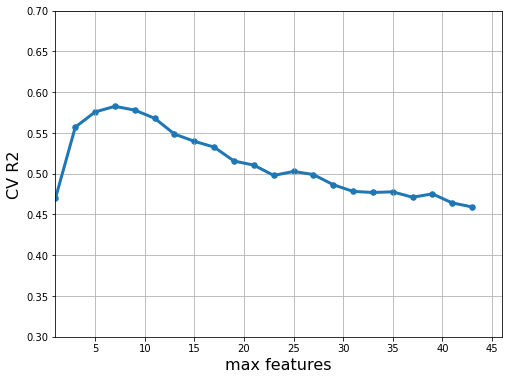

In [63]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 46])
plt.ylim([0.3, 0.7])

In [64]:
print(rf_cv.best_params_)
print('Cross-validated R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(OSR2(rf_cv, x_test, y_test, y_train), 5))
mvp_rf_imp_features = pd.DataFrame({'Feature' : x_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)
mvp_rf_imp_features = mvp_rf_imp_features.sort_values('Importance score', ascending=False)
mvp_rf_imp_features

{'max_features': 7, 'min_samples_leaf': 5, 'n_estimators': 250, 'random_state': 88}
Cross-validated R2: 0.58265
OSR2: 0.66224


,Feature,Importance score
24,PTS,14.6
13,FTM,11.1
4,FGA,10.4
3,FGM,9.3
14,FTA,8.6
10,X2PA,7.7
9,X2PM,6.6
2,MP,5.0
22,TOV,4.9
17,DRB,3.2


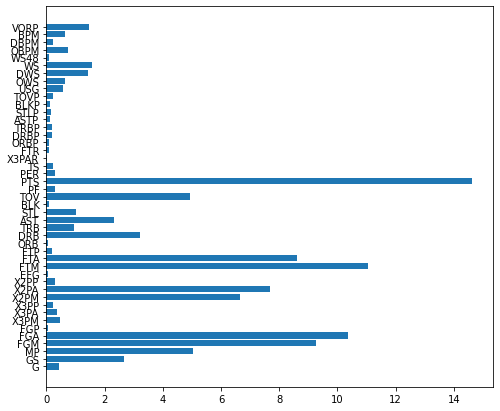

In [65]:
plt.figure(figsize=(8,7))
plt.barh(x_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()

#### ROY Predictions

In [66]:
roy_preds = pd.DataFrame(y_train)
roy_preds['preds'] = rf_cv.predict(x_train)
roy_preds['Player'] = roy_data['Player']
roy_preds['Season'] = roy_data['Season']
roy_preds = roy_preds.rename(columns = {'ROY': 'actual'})
roy_preds = roy_preds.sort_values(by=['preds'], ascending=False)

In [67]:
roy_preds_test = pd.DataFrame(y_test)
roy_preds_test['preds'] = rf_cv.predict(x_test)
roy_preds_test['Player'] = roy_data['Player']
roy_preds_test['Season'] = roy_data['Season']
roy_preds_test = roy_preds_test.rename(columns = {'ROY': 'actual'})
roy_preds_test = roy_preds_test.sort_values(by=['preds'], ascending=False)

In [69]:
roy2021 = pd.read_csv('roy2021.csv')
roy2021_test = roy2021.iloc[:,6:51]

roy_test_2021 = pd.DataFrame(columns = ['preds'])
roy_test_2021['preds'] = rf_cv.predict(roy2021_test)
roy_test_2021['Player'] = roy2021['Player']
roy_test_2021['Season'] = roy2021['Season']

roy_test_2021 = roy_test_2021.sort_values(by=['preds'], ascending=False)
roy_test_2021.head()

,preds,Player,Season
3,0.489341,Anthony Edwards,2021
50,0.301638,LaMelo Ball,2021
83,0.150051,Tyrese Haliburton,2021
9,0.148255,Cameron Oliver,2021
73,0.087226,Saddiq Bey,2021


#### ROY Errors

In [72]:
#collect average difference of actual voting shares and predicting voting shares for the top 10 predicted MVPs of each season from 2010-2017
#calculate the total average of the average differences of each season
avgdiff_array = np.array([])
years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
for year in years:
    season_sort = roy_preds.sort_values(by=['Season'])
    season = season_sort.loc[season_sort['Season'] == year]
    roy = season.loc[season['actual'] > 0.0]
    top10roy = roy.sort_values(by=['actual'], ascending = False).head(10)
    top10roy['Abs Diff'] = abs(top10roy['actual'] - top10roy['preds'])
    avgdiff = top10roy['Abs Diff'].mean()
    avgdiff_array = np.append(avgdiff_array, avgdiff)
avgdiff_roy_train = np.mean(avgdiff_array)
print('Top 10 ROY Absolute Mean Errors Train:', avgdiff_roy_train)

avgdiff_array = np.array([])
years = np.array([2018, 2019, 2020])
for year in years:
    season_sort = roy_preds_test.sort_values(by=['Season'])
    season = season_sort.loc[season_sort['Season'] == year]
    roy = season.loc[season['actual'] > 0.0]
    top10roy = roy.sort_values(by=['actual'], ascending = False).head(10)
    top10roy['Abs Diff'] = abs(top10roy['actual'] - top10roy['preds'])
    avgdiff = top10roy['Abs Diff'].mean()
    avgdiff_array = np.append(avgdiff_array, avgdiff)
avgdiff_roy_test = np.mean(avgdiff_array)
print('Top 10 ROY Absolute Mean Errors Test:', avgdiff_roy_test)

avgdiff_roy = (avgdiff_roy_train * 8 + avgdiff_roy_test * 3) / 11

print('Top 10 ROY Absolute Mean Errors:', avgdiff_roy)

Top 10 ROY Absolute Mean Errors Train: 0.10358407898127886
Top 10 ROY Absolute Mean Errors Test: 0.186398523858203
Top 10 ROY Absolute Mean Errors: 0.12616983667498544


## Award 5: Defensive Player of the Year 

In [41]:
dataset = pd.read_csv('update142.csv')

dpoy_train = dataset[dataset['Season'] <= 2017]
dpoy_test = dataset[dataset['Season'] > 2017]

y_train = dpoy_train['DPOY']
y_test = dpoy_test['DPOY']
x_train = dpoy_train.iloc[:,6:51]
x_test = dpoy_test.iloc[:,6:51]

In [42]:
grid_values = {'max_features': np.linspace(1,46,23, dtype='int32'),
               'min_samples_leaf': [5],
               'n_estimators': [500],
               'random_state': [88]} 

rf2 = RandomForestRegressor() 
cv = KFold(n_splits=5,random_state=333,shuffle=True) 
rf_cv = GridSearchCV(rf2, param_grid=grid_values, scoring='r2', cv=cv,verbose=2)
rf_cv.fit(x_train, y_train)

Fitting 5 folds for each of 23 candidates, totalling 115 fits
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.4s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.4s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.3s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.4s
[CV] END max_features=1, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   1.3s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.3s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.2s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.2s
[CV] END max_features=3, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   2.2s
[CV] END max_features=3, min_samples_leaf=5, n_

/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.3s


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py:610: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
Traceback (most recent call last):
  File "/opt/conda/lib/python3.8/site-packages/sklearn/model_selection/_validation.py", line 593, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.8/site-packages/sklearn/ensemble/_forest.py", line 387, in fit
    trees = Parallel(n_jobs=self.n_jobs, verbose=self.verbose,
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 1041, in __call__
    if self.dispatch_one_batch(iterator):
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 859, in dispatch_one_batch
    self._dispatch(tasks)
  File "/opt/conda/lib/python3.8/site-packages/joblib/parallel.py", line 777, in _dispatch
    job = self._backend.apply_async(batch, callback=cb)
  File "/opt/conda/lib/

[CV] END max_features=46, min_samples_leaf=5, n_estimators=500, random_state=88; total time=   0.2s


GridSearchCV(cv=KFold(n_splits=5, random_state=333, shuffle=True),
             estimator=RandomForestRegressor(),
             param_grid={'max_features': array([ 1,  3,  5,  7,  9, 11, 13, 15, 17, 19, 21, 23, 25, 27, 29, 31, 33,
       35, 37, 39, 41, 43, 46], dtype=int32),
                         'min_samples_leaf': [5], 'n_estimators': [500],
                         'random_state': [88]},
             scoring='r2', verbose=2)

(0.2, 0.5)

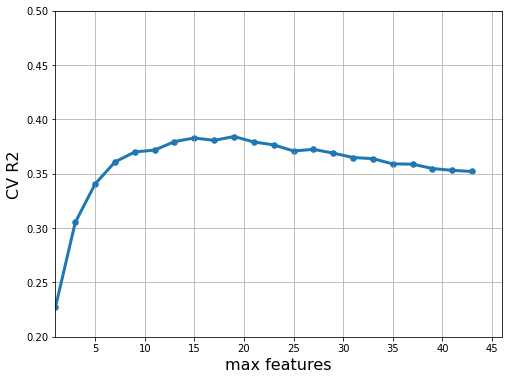

In [45]:
max_features = rf_cv.cv_results_['param_max_features'].data
R2_scores = rf_cv.cv_results_['mean_test_score']

plt.figure(figsize=(8, 6))
plt.xlabel('max features', fontsize=16)
plt.ylabel('CV R2', fontsize=16)
plt.scatter(max_features, R2_scores, s=30)
plt.plot(max_features, R2_scores, linewidth=3)
plt.grid(True, which='both')
plt.xlim([1, 46])
plt.ylim([0.2, 0.5])

In [51]:
print(rf_cv.best_params_)
print('Cross-validated R2:', round(rf_cv.best_score_, 5))
print('OSR2:', round(OSR2(rf_cv, x_test, y_test, y_train), 5))
mvp_rf_imp_features = pd.DataFrame({'Feature' : x_train.columns,  
              'Importance score': 100*rf_cv.best_estimator_.feature_importances_}).round(1)
mvp_rf_imp_features = mvp_rf_imp_features.sort_values('Importance score', ascending=False)
mvp_rf_imp_features

{'max_features': 19, 'min_samples_leaf': 5, 'n_estimators': 500, 'random_state': 88}
Cross-validated R2: 0.3842
OSR2: 0.35729


,Feature,Importance score
38,DWS,34.1
42,DBPM,10.4
21,BLK,9.7
17,DRB,4.7
44,VORP,3.1
39,WS,2.9
35,TOVP,2.7
18,TRB,2.7
43,BPM,2.4
2,MP,2.2


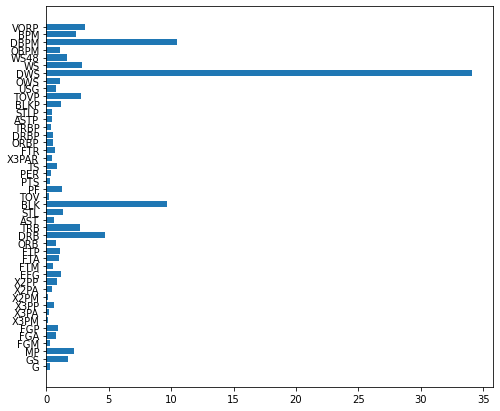

In [52]:
plt.figure(figsize=(8,7))
plt.barh(x_train.columns, 100*rf_cv.best_estimator_.feature_importances_)
plt.show()

#### DPOY Predictions 

In [54]:
dpoy_preds = pd.DataFrame(y_train)
dpoy_preds['preds'] = rf_cv.predict(x_train)
dpoy_preds['Player'] = dataset['Player']
dpoy_preds['Season'] = dataset['Season']
dpoy_preds = dpoy_preds.rename(columns = {'DPOY': 'actual'})
dpoy_preds = dpoy_preds.sort_values(by=['preds'], ascending=False)

dpoy_preds_test = pd.DataFrame(y_test)
dpoy_preds_test['preds'] = rf_cv.predict(x_test)
dpoy_preds_test['Player'] = dataset['Player']
dpoy_preds_test['Season'] = dataset['Season']
dpoy_preds_test = dpoy_preds_test.rename(columns = {'DPOY': 'actual'})
dpoy_preds_test = dpoy_preds_test.sort_values(by=['preds'], ascending=False)

dpoy_preds_test[dpoy_preds_test['Season'] == 2020].head()

,actual,preds,Player,Season
1498,0.864,0.221958,Giannis Antetokounmpo,2020
1606,0.006,0.152920,Hassan Whiteside,2020
3697,0.374,0.133735,Rudy Gobert,2020
252,0.400,0.116840,Anthony Davis,2020
3595,0.000,0.090207,Robert Williams,2020


In [56]:
nba2021 = pd.read_csv('nba2021.csv')
dpoy2021_test = nba2021.iloc[:,6:51]

dpoy_test_2021 = pd.DataFrame(columns = ['preds'])
dpoy_test_2021['preds'] = rf_cv.predict(dpoy2021_test)
dpoy_test_2021['Player'] = nba2021['Player']
dpoy_test_2021['Season'] = nba2021['Season']

dpoy_test_2021 = dpoy_test_2021.sort_values(by=['preds'], ascending=False)
dpoy_test_2021.head()

,preds,Player,Season
177,0.196612,Rudy Gobert,2021
491,0.112132,Myles Turner,2021
11,0.098392,Giannis Antetokounmpo,2021
395,0.095127,Gary Payton II,2021
523,0.094186,Robert Williams,2021


#### DPOY Errors

In [73]:
#collect average difference of actual voting shares and predicting voting shares for the top 10 predicted MVPs of each season from 2010-2017
#calculate the total average of the average differences of each season
avgdiff_array = np.array([])
years = np.array([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017])
for year in years:
    season_sort = dpoy_preds.sort_values(by=['Season'])
    season = season_sort.loc[season_sort['Season'] == year]
    mvp = season.loc[season['actual'] > 0.0]
    top10dpoy = mvp.sort_values(by=['actual'], ascending = False).head(10)
    top10dpoy['Abs Diff'] = abs(top10dpoy['actual'] - top10dpoy['preds'])
    avgdiff = top10dpoy['Abs Diff'].mean()
    avgdiff_array = np.append(avgdiff_array, avgdiff)
avgdiff_dpoy_train = np.mean(avgdiff_array)
print('Top 10 DPOY Absolute Mean Errors Train:', avgdiff_dpoy_train)

avgdiff_array = np.array([])
years = np.array([2018, 2019, 2020])
for year in years:
    season_sort = dpoy_preds_test.sort_values(by=['Season'])
    season = season_sort.loc[season_sort['Season'] == year]
    mvp = season.loc[season['actual'] > 0.0]
    top10dpoy = mvp.sort_values(by=['actual'], ascending = False).head(10)
    top10dpoy['Abs Diff'] = abs(top10dpoy['actual'] - top10dpoy['preds'])
    avgdiff = top10dpoy['Abs Diff'].mean()
    avgdiff_array = np.append(avgdiff_array, avgdiff)
avgdiff_dpoy_test = np.mean(avgdiff_array)
print('Top 10 DPOY Absolute Mean Errors Test:', avgdiff_dpoy_test)

avgdiff_dpoy = (avgdiff_dpoy_train * 8 + avgdiff_dpoy_test * 3) / 11

print('Top 10 DPOY Absolute Mean Errors:', avgdiff_dpoy)

Top 10 DPOY Absolute Mean Errors Train: 0.10003449144093049
Top 10 DPOY Absolute Mean Errors Test: 0.13214036244216484
Top 10 DPOY Absolute Mean Errors: 0.10879063807763076
